In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
root_dir = os.getcwd()
year_folders = [f for f in os.listdir(root_dir) if f.startswith("20")]

all_df = pd.DataFrame(
    columns=["Participante", "Texto", "Sentimiento", "Palabras", "Dia", "Mes", "Anio"]
)

In [3]:
# Tree of folders
for year in year_folders:
    month_folders = os.listdir(os.path.join(root_dir, year))
    for month in month_folders:
        day_folders = os.listdir(os.path.join(*[root_dir, year, month]))
        for day in day_folders:
            final_path = os.path.join(*[root_dir, year, month, day])
            file_name = [f for f in os.listdir(final_path) if f.endswith(".csv")][0]
            all_df = pd.concat(
                [
                    pd.read_csv(os.path.join(*[root_dir, year, month, day, file_name])),
                    all_df,
                ],
                axis=0,
                ignore_index=True,
            )
all_df

/var/folders/v0/vyb8z9hs3b166f_7lmxwvfbr0000gn/T/ipykernel_78049/4292726032.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_df = pd.concat(


,Participante,Texto,Sentimiento,Palabras,Dia,Mes,Anio
0,-PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Informarles que el día de hoy voy a enviar al...,0.001959,58,6,12,2018
1,-PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Les doy a conocer los nombres de quienes están...,0.771382,10,6,12,2018
2,-PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,La abogada Loretta Ortiz. Ella es egresada de ...,0.034682,27,6,12,2018
3,-PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"También, la licenciada Celia Maya García. Ella...",0.003624,46,6,12,2018
4,-PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Y el tercer abogado propuesto es el licenciado...,0.017006,39,6,12,2018
...,...,...,...,...,...,...,...
352829,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Y va a seguir ayudando Ricardo en Coahuila par...,0.000000,38,15,12,2022
352830,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Esto me lo plantearon en una reunión que tuve ...,0.000000,67,15,12,2022
352831,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"Entonces, él va a seguir ayudándonos en esto.",0.000000,8,15,12,2022
352832,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"Y con mucha responsabilidad, con mucha madurez...",0.000000,44,15,12,2022


In [4]:
all_df.to_csv('/Users/almacuevas/work_projects/conferencias_matutinas_amlo/all_df.csv')

In [5]:
df_2018 = all_df.loc[all_df["Anio"]==2018]
df_2019 = all_df.loc[all_df["Anio"]==2019]
df_2020 = all_df.loc[all_df["Anio"]==2020]
df_2021 = all_df.loc[all_df["Anio"]==2021]
df_2022 = all_df.loc[all_df["Anio"]==2022]
df_2023 = all_df.loc[all_df["Anio"]==2023]
df_2018.to_csv('/Users/almacuevas/work_projects/conferencias_matutinas_amlo/df_2018.csv')
df_2019.to_csv('/Users/almacuevas/work_projects/conferencias_matutinas_amlo/df_2019.csv')
df_2020.to_csv('/Users/almacuevas/work_projects/conferencias_matutinas_amlo/df_2020.csv')
df_2021.to_csv('/Users/almacuevas/work_projects/conferencias_matutinas_amlo/df_2021.csv')
df_2022.to_csv('/Users/almacuevas/work_projects/conferencias_matutinas_amlo/df_2022.csv')
df_2023.to_csv('/Users/almacuevas/work_projects/conferencias_matutinas_amlo/df_2023.csv')

# Basic graph

In [6]:
words_per_year = all_df.groupby(by=["Anio", "Mes", "Dia" ]).agg({'Palabras': 'mean'}).reset_index()
words_per_year

,Anio,Mes,Dia,Palabras
0,2018,12,4,27.79878
1,2018,12,6,25.635514
2,2018,12,7,26.480663
3,2018,12,10,29.829787
4,2018,12,26,34.4625
...,...,...,...,...
1143,2023,9,4,42.627451
1144,2023,9,5,42.589443
1145,2023,9,6,36.544379
1146,2023,9,7,33.491349


/Users/almacuevas/work_projects/conferencias_matutinas_amlo/env_amlo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almacuevas/work_projects/conferencias_matutinas_amlo/env_amlo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almacuevas/work_projects/conferencias_matutinas_amlo/env_amlo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'Number of words'),
 Text(0, 0.5, 'Year'),
 Text(0.5, 1.0, 'Words said per year')]

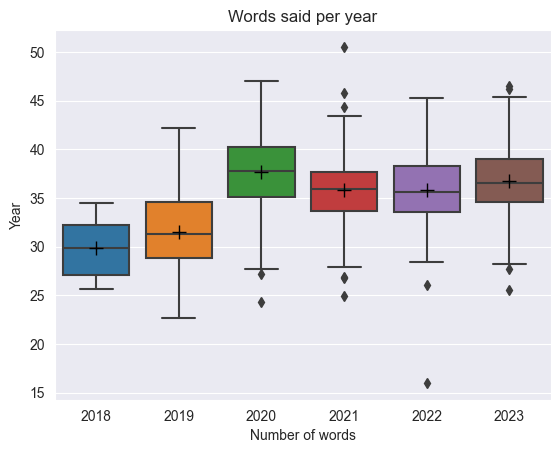

In [7]:
ax = sns.boxplot(data=words_per_year, x="Anio", y="Palabras", showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
ax.set(xlabel='Number of words',
       ylabel='Year',
       title='Words said per year')